In [2]:
%load_ext autoreload
%autoreload 2

import os
# import pickle
# from src import utils
# import joblib
import matplotlib.pyplot as plt
from src.utils import plot_history

import tensorflow as tf
# from tensorflow.keras.metrics import Accuracy,FalsePositives,FalseNegatives
# from tensorflow.keras.metrics import TruePositives,TrueNegatives,Precision,Recall,AUC
# from sklearn.metrics import confusion_matrix
import seaborn as sns
from src.utils import load_data
# from src.helper import models

from sklearn import metrics
import random
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Plot Train Accuracy & Train Loss

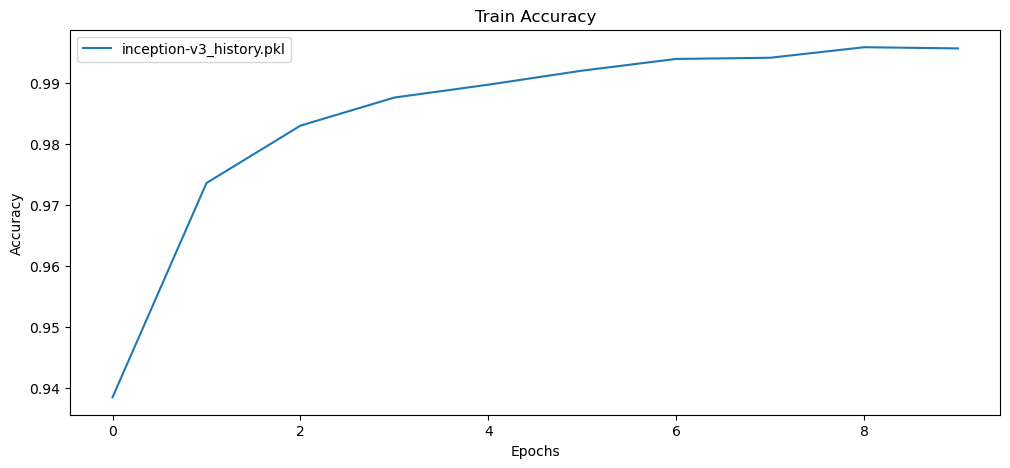

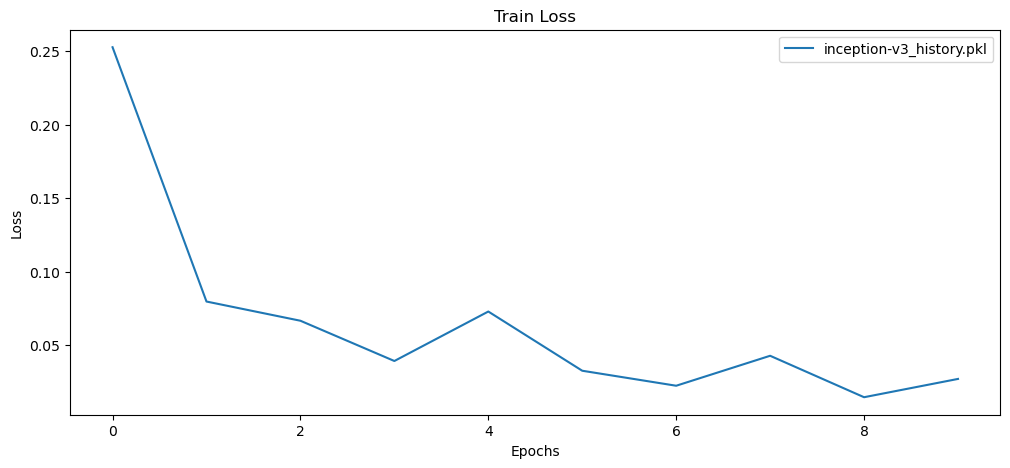

In [3]:
plot_history(path = "models/inception-v3")

# Evaluate Model

In [4]:
train_loader, test_loader, train_labels, test_labels = load_data()

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


In [5]:
# model_dir = "models/"
# file_list = os.listdir(model_dir)
# model_file_list = [f for f in file_list if '.h5' in f]
model = tf.keras.models.load_model ("models/inception-v3/inception-v3.h5")

2023-08-14 15:59:28.038351: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.evaluate(test_loader)

13/13 [==============================] - 8s 534ms/step - loss: 4.0648 - accuracy: 0.7997


[4.064767837524414, 0.7996794581413269]

# ROC Curve

1/1 [==============================] - 0s 169ms/step


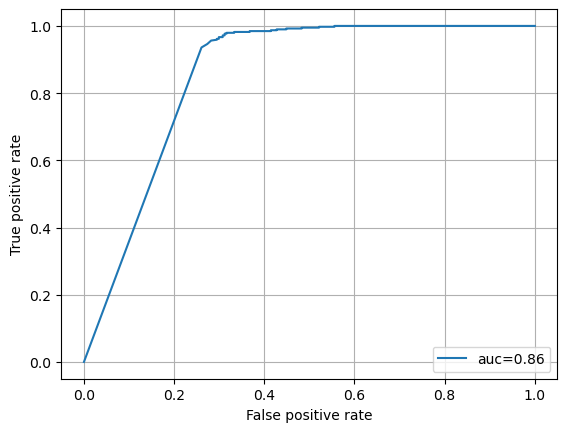

In [7]:
X_img_batch, y_true_batch = test_loader[0]
y_true_batch.shape

y_true, y_pred = np.empty(0), np.empty(0)
for i in range(len(test_loader)):
# for i in range(20):
    X_img_batch, y_true_batch = test_loader[i]
    y_true_batch = y_true_batch[:,1]
    
    y_pred_batch = model.predict(X_img_batch)
    y_pred_batch = y_pred_batch[:,1]

    y_true = np.concatenate((y_true, y_true_batch), axis=0)
    y_pred = np.concatenate((y_pred, y_pred_batch), axis=0)

y_true = y_true.astype(int)
# y_pred = y_pred.astype(int)
fpr, tpr, _ = metrics.roc_curve(y_true, 
                                y_pred)
auc = metrics.roc_auc_score(y_true, y_pred)
plt.plot(fpr, tpr, label=f"auc={str(round(auc, 2))}")
plt.legend(loc = 'lower right')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

plt.grid()
plt.show()


# Confusion Matrix

In [22]:
result = []
for i in y_pred:
    if i>=0.6:
        result.append(1)
    else:
        result.append(0)
# result

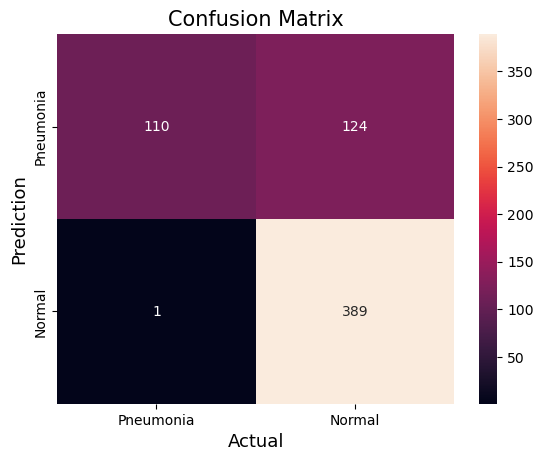

In [23]:
cm = metrics.confusion_matrix(y_true, result)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Pneumonia','Normal'],
            yticklabels=['Pneumonia','Normal'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=15)
plt.show()

# Model Report

In [17]:
report = classification_report(y_true, y_pred.astype(int))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80       234
           1       0.86      0.94      0.89       390

    accuracy                           0.86       624
   macro avg       0.87      0.84      0.85       624
weighted avg       0.86      0.86      0.86       624

